<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Algorithmic Trading

**Chapter 03 &mdash; Working with Financial Data**

## Sample Data Set from Eikon

## Reading Financial Data From Different Sources

### The Data Set

In [1]:
fn = '../data/AAPL.csv'

In [2]:
with open(fn, 'r') as f:
    for _ in range(5):
        print(f.readline(), end='')

Date,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
2020-04-01,248.72,240.91,239.13,246.5,460606.0,44054638.0
2020-04-02,245.15,244.93,236.9,240.34,380294.0,41483493.0
2020-04-03,245.7,241.41,238.9741,242.8,293699.0,32470017.0
2020-04-06,263.11,262.47,249.38,250.9,486681.0,50455071.0


### Reading from a CSV File with Python

In [3]:
import csv

In [4]:
csv_reader = csv.reader(open(fn, 'r'))

In [5]:
data = [l for l in csv_reader]

In [6]:
data[:5]

[['Date', 'HIGH', 'CLOSE', 'LOW', 'OPEN', 'COUNT', 'VOLUME'],
 ['2020-04-01',
  '248.72',
  '240.91',
  '239.13',
  '246.5',
  '460606.0',
  '44054638.0'],
 ['2020-04-02',
  '245.15',
  '244.93',
  '236.9',
  '240.34',
  '380294.0',
  '41483493.0'],
 ['2020-04-03',
  '245.7',
  '241.41',
  '238.9741',
  '242.8',
  '293699.0',
  '32470017.0'],
 ['2020-04-06',
  '263.11',
  '262.47',
  '249.38',
  '250.9',
  '486681.0',
  '50455071.0']]

In [7]:
csv_reader = csv.DictReader(open(fn, 'r'))

In [8]:
data = [l for l in csv_reader]

In [9]:
data[:3]

[{'Date': '2020-04-01',
  'HIGH': '248.72',
  'CLOSE': '240.91',
  'LOW': '239.13',
  'OPEN': '246.5',
  'COUNT': '460606.0',
  'VOLUME': '44054638.0'},
 {'Date': '2020-04-02',
  'HIGH': '245.15',
  'CLOSE': '244.93',
  'LOW': '236.9',
  'OPEN': '240.34',
  'COUNT': '380294.0',
  'VOLUME': '41483493.0'},
 {'Date': '2020-04-03',
  'HIGH': '245.7',
  'CLOSE': '241.41',
  'LOW': '238.9741',
  'OPEN': '242.8',
  'COUNT': '293699.0',
  'VOLUME': '32470017.0'}]

In [10]:
sum([float(l['CLOSE']) for l in data]) / len(data)

272.3861904761905

### Reading from a CSV File with pandas

In [11]:
import pandas as pd

In [12]:
data = pd.read_csv(fn, index_col=0,
                   parse_dates=True)

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 21 entries, 2020-04-01 to 2020-04-30
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    21 non-null     float64
 1   CLOSE   21 non-null     float64
 2   LOW     21 non-null     float64
 3   OPEN    21 non-null     float64
 4   COUNT   21 non-null     float64
 5   VOLUME  21 non-null     float64
dtypes: float64(6)
memory usage: 1.1 KB


In [14]:
data.tail()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2020-04-24,283.01,282.97,277.00,277.20,306176.0,31627183.0
2020-04-27,284.54,283.17,279.95,281.80,300771.0,29271893.0
2020-04-28,285.83,278.58,278.20,285.08,285384.0,28001187.0
2020-04-29,289.67,287.73,283.89,284.73,324890.0,34320204.0
2020-04-30,294.53,293.80,288.35,289.96,471129.0,45765968.0


In [15]:
data['CLOSE'].mean()

np.float64(272.38619047619056)

### Exporting to Excel and JSON

Create the local `data` folder if necessary via

    !mkdir data

In [16]:
data.to_excel('./data/aapl.xlsx', 'AAPL')

C:\Users\nicol\AppData\Local\Temp\ipykernel_10040\1110238001.py:1: FutureWarning: Starting with pandas version 3.0 all arguments of to_excel except for the argument 'excel_writer' will be keyword-only.
  data.to_excel('./data/aapl.xlsx', 'AAPL')


In [17]:
data.to_json('data/aapl.json')

In [18]:
##ls -n data/

### Reading from Excel and JSON

In [19]:
data_copy_1 = pd.read_excel('data/aapl.xlsx', 'AAPL',
                            index_col=0)

In [20]:
data_copy_1.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2020-04-01,248.72,240.91,239.1300,246.50,460606,44054638
2020-04-02,245.15,244.93,236.9000,240.34,380294,41483493
2020-04-03,245.70,241.41,238.9741,242.80,293699,32470017
2020-04-06,263.11,262.47,249.3800,250.90,486681,50455071
2020-04-07,271.70,259.43,259.0000,270.80,467375,50721831


In [21]:
data_copy_2 = pd.read_json('data/aapl.json')

In [22]:
data_copy_2.head()

,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
2020-04-01,248.72,240.91,239.1300,246.50,460606,44054638
2020-04-02,245.15,244.93,236.9000,240.34,380294,41483493
2020-04-03,245.70,241.41,238.9741,242.80,293699,32470017
2020-04-06,263.11,262.47,249.3800,250.90,486681,50455071
2020-04-07,271.70,259.43,259.0000,270.80,467375,50721831


In [23]:
!rm data/aapl.*

## Working with Open Data Sources

In [24]:
import configparser
config = configparser.ConfigParser()
config.read('../pyalgo.cfg')

['../pyalgo.cfg']

In [25]:
import quandl as q
import configparser


c = configparser.ConfigParser()
c.read('../pyalgo.cfg')  # adjust path to your cred file

q.ApiConfig.api_key = c['quandl']['api_key']

data = q.get('BCHAIN/MKPRU', api_key=c['quandl']['api_key'])

[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker         BTC-USD     BTC-USD     BTC-USD     BTC-USD   BTC-USD
Date                                                                
2015-01-01  314.248993  320.434998  314.002991  320.434998   8036550
2015-01-02  315.032013  315.838989  313.565002  314.079010   7860650
2015-01-03  281.082001  315.149994  281.082001  314.846008  33054400
2015-01-04  264.195007  287.230011  257.612000  281.145996  55629100
2015-01-05  274.473999  278.341003  265.084015  265.084015  43962800


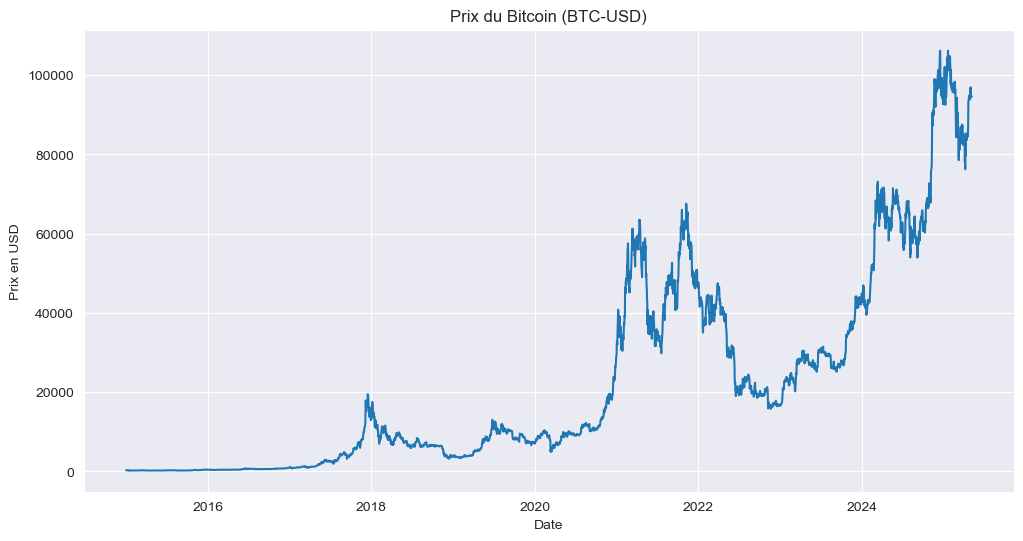

In [30]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

# Télécharger les données Bitcoin
data = yf.download('BTC-USD', start='2015-01-01')

# Afficher les premières lignes
print(btc_data.head())

# Visualiser le prix de clôture
plt.figure(figsize=(12, 6))
plt.plot(btc_data['Close'])
plt.title('Prix du Bitcoin (BTC-USD)')
plt.xlabel('Date')
plt.ylabel('Prix en USD')
plt.grid(True)
plt.show()




QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3779 entries, 2015-01-01 to 2025-05-06
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   (Close, BTC-USD)   3779 non-null   float64
 1   (High, BTC-USD)    3779 non-null   float64
 2   (Low, BTC-USD)     3779 non-null   float64
 3   (Open, BTC-USD)    3779 non-null   float64
 4   (Volume, BTC-USD)  3779 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 177.1 KB


In [32]:
data['Value'].resample('A').last()

KeyError: 'Value'

In [33]:
data = q.get('FSE/SAP_X', start_date='2018-1-1',
             end_date='2023-10-01',
             api_key=config['quandl']['api_key'])

QuandlError: (Status 403) Something went wrong. Please try again. If you continue to have problems, please contact us at connect@quandl.com.

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 730 entries, 2018-01-02 to 2020-12-01
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Open                   408 non-null    float64
 1   High                   730 non-null    float64
 2   Low                    730 non-null    float64
 3   Close                  730 non-null    float64
 4   Change                 0 non-null      object 
 5   Traded Volume          684 non-null    float64
 6   Turnover               684 non-null    float64
 7   Last Price of the Day  0 non-null      object 
 8   Daily Traded Units     0 non-null      object 
 9   Daily Turnover         0 non-null      object 
dtypes: float64(6), object(4)
memory usage: 62.7+ KB


In [31]:
q.ApiConfig.api_key = config['quandl']['api_key']

In [32]:
# vol = q.get('VOL/MSFT')

In [33]:
# vol.iloc[:, :10].info()

In [34]:
# vol[['IvMean30', 'IvMean60', 'IvMean90']].tail()

## Refinitiv Eikon Data API

`pip install eikon` &mdash; Requires a paid subscription.

In [35]:
import eikon as ek

In [36]:
ek.set_app_key(config['eikon']['app_key'])

In [37]:
help(ek)

Help on package eikon:

NAME
    eikon - # coding: utf-8

PACKAGE CONTENTS
    Profile
    data_grid
    eikonError
    json_requests
    news_request
    streaming_session (package)
    symbology
    time_series
    tools
    vendor (package)

SUBMODULES
    cache
    desktop_session
    istream_callback
    itemstream
    session
    stream
    stream_connection
    streamingprice
    streamingprice_callback
    streamingprices

VERSION
    1.1.18

FILE
    /Users/yves/Python/envs/py4at/lib/python3.10/site-packages/eikon/__init__.py




### Retrieving Historical Structured Data

In [38]:
import warnings; warnings.simplefilter('ignore')

In [39]:
symbols = ['AAPL.O', 'MSFT.O', 'GOOG.O']

In [40]:
data = ek.get_timeseries(symbols,
                         start_date='2023-01-01',
                         end_date='2023-05-01',
                         interval='daily',
                         fields=['*'])

In [41]:
data.keys()

MultiIndex([('AAPL.O',   'HIGH'),
            ('AAPL.O',  'CLOSE'),
            ('AAPL.O',    'LOW'),
            ('AAPL.O',   'OPEN'),
            ('AAPL.O',  'COUNT'),
            ('AAPL.O', 'VOLUME'),
            ('MSFT.O',   'HIGH'),
            ('MSFT.O',  'CLOSE'),
            ('MSFT.O',    'LOW'),
            ('MSFT.O',   'OPEN'),
            ('MSFT.O',  'COUNT'),
            ('MSFT.O', 'VOLUME'),
            ('GOOG.O',   'HIGH'),
            ('GOOG.O',  'CLOSE'),
            ('GOOG.O',    'LOW'),
            ('GOOG.O',   'OPEN'),
            ('GOOG.O',  'COUNT'),
            ('GOOG.O', 'VOLUME')],
           names=['Security', 'Field'])

In [42]:
type(data['AAPL.O'])

pandas.core.frame.DataFrame

In [43]:
data['AAPL.O'].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 82 entries, 2023-01-03 to 2023-05-01
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HIGH    82 non-null     Float64
 1   CLOSE   82 non-null     Float64
 2   LOW     82 non-null     Float64
 3   OPEN    82 non-null     Float64
 4   COUNT   82 non-null     Int64  
 5   VOLUME  82 non-null     Int64  
dtypes: Float64(4), Int64(2)
memory usage: 5.0 KB


In [44]:
data['AAPL.O'].tail()

Field,HIGH,CLOSE,LOW,OPEN,COUNT,VOLUME
Date,,,,,,
2023-04-25,166.305,163.77,163.73,165.19,501551,48714063
2023-04-26,165.28,163.76,162.8,163.055,493405,45498796
2023-04-27,168.56,168.41,165.19,165.19,575982,64902329
2023-04-28,169.85,169.68,167.8801,168.49,527763,55275851
2023-05-01,170.45,169.59,168.64,169.28,540746,52472936


In [45]:
%%time
data = ek.get_timeseries(symbols,
                         start_date='2023-05-05',
                         end_date='2023-05-06',
                         interval='minute',
                         fields='*')

CPU times: user 50.5 ms, sys: 4.59 ms, total: 55.1 ms
Wall time: 2.58 s


In [46]:
print(data['GOOG.O'].loc['2023-05-05 16:00:00':
                         '2023-05-05 16:04:00'].round(1))

Field                 HIGH    LOW   OPEN  CLOSE  COUNT  VOLUME
Date                                                          
2023-05-05 16:00:00  105.3  105.2  105.2  105.3    356   30083
2023-05-05 16:01:00  105.4  105.3  105.3  105.3    391   27480
2023-05-05 16:02:00  105.4  105.3  105.3  105.4    532   40068
2023-05-05 16:03:00  105.4  105.3  105.4  105.3    403   54467
2023-05-05 16:04:00  105.3  105.3  105.3  105.3    205   17119


In [47]:
for sym in symbols:
    print('\n' + sym + '\n', data[sym].iloc[-300:-295].round(1))


AAPL.O
 Field                 HIGH    LOW   OPEN  CLOSE  COUNT  VOLUME
Date                                                          
2023-05-05 19:01:00  174.2  174.1  174.2  174.1   1038  106830
2023-05-05 19:02:00  174.1  174.0  174.1  174.0   1516  164663
2023-05-05 19:03:00  174.0  173.9  174.0  174.0   1261  124852
2023-05-05 19:04:00  174.1  174.0  174.0  174.0   1014  107868
2023-05-05 19:05:00  174.1  174.0  174.0  174.1    958   76527

MSFT.O
 Field                 HIGH    LOW   OPEN  CLOSE  COUNT  VOLUME
Date                                                          
2023-05-05 19:01:00  311.6  311.4  311.6  311.4   1047   68248
2023-05-05 19:02:00  311.5  311.2  311.4  311.3    812   62585
2023-05-05 19:03:00  311.5  311.2  311.2  311.3    750   45131
2023-05-05 19:04:00  311.5  311.2  311.3  311.4    764   63286
2023-05-05 19:05:00  311.5  311.3  311.4  311.5    819   68731

GOOG.O
 Field                 HIGH    LOW   OPEN  CLOSE  COUNT  VOLUME
Date                        

In [48]:
%%time
data = ek.get_timeseries(symbols[0],
                         start_date='2023-09-05 15:00:00',
                         end_date='2023-09-05 15:30:00',
                         interval='tick',
                         fields=['*'])

CPU times: user 106 ms, sys: 6.51 ms, total: 113 ms
Wall time: 2.33 s


In [49]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 34370 entries, 2023-09-05 15:00:00.019000 to 2023-09-05 15:29:59.842000
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   VALUE   34302 non-null  Float64
 1   VOLUME  34370 non-null  Int64  
dtypes: Float64(1), Int64(1)
memory usage: 872.7 KB


In [50]:
data.head()

AAPL.O,VALUE,VOLUME
Date,,
2023-09-05 15:00:00.019,189.06,100
2023-09-05 15:00:00.045,189.06,300
2023-09-05 15:00:00.048,189.07,10
2023-09-05 15:00:00.050,189.07,100
2023-09-05 15:00:00.050,189.07,1


In [51]:
resampled = data.resample('30s', label='right').agg(
            {'VALUE': 'last', 'VOLUME': 'sum'}) # <6>

In [52]:
resampled.tail()

AAPL.O,VALUE,VOLUME
Date,,
2023-09-05 15:28:00,189.287,22150
2023-09-05 15:28:30,189.1722,36746
2023-09-05 15:29:00,189.1787,19980
2023-09-05 15:29:30,189.21,26532
2023-09-05 15:30:00,189.16,40326


### Retrieving Historical Unstructured Data

In [53]:
headlines = ek.get_news_headlines(query='R:AAPL.O macbook',
                                  count=5,
                                  date_from='2023-1-1',
                                  date_to='2023-5-1')

In [54]:
headlines

,versionCreated,text,storyId,sourceCode
2023-04-20 17:32:40.760,2023-04-20 17:32:40.760000+00:00,Cook turns focus on non-iPhone products in whi...,urn:newsml:newswire.refinitiv.com:20230420:nNR...,NS:BUSSTA
2023-04-10 08:57:06.695,2023-04-10 08:57:06.695000+00:00,6 Apple laptops that will supercharge your pro...,urn:newsml:newswire.refinitiv.com:20230410:nNR...,NS:HINDUT
2023-03-30 14:01:23.897,2023-03-30 14:01:23.897000+00:00,"Apple WWDC 2023: AR/VR headsets, Mac Pro & new...",urn:newsml:newswire.refinitiv.com:20230330:nNR...,NS:INDIAE
2023-02-20 21:46:54.205,2023-02-20 21:46:54.205000+00:00,Power up the best Presidents Day laptop deals ...,urn:newsml:newswire.refinitiv.com:20230220:nNR...,NS:USADAY
2023-02-20 08:33:10.912,2023-02-20 08:33:10.912000+00:00,MacBook Pro M2 Pro review: Apple's best laptop...,urn:newsml:newswire.refinitiv.com:20230220:nNR...,NS:THEGRD


In [55]:
story = headlines.iloc[1]

In [56]:
story

versionCreated                     2023-04-10 08:57:06.695000+00:00
text              6 Apple laptops that will supercharge your pro...
storyId           urn:newsml:newswire.refinitiv.com:20230410:nNR...
sourceCode                                                NS:HINDUT
Name: 2023-04-10 08:57:06.695000, dtype: object

In [57]:
news_text = ek.get_news_story(story['storyId'])

In [58]:
from IPython.display import HTML

In [59]:
HTML(news_text)

## Storing Financial Data Efficiently

### Storing DataFrame Objects

In [60]:
from sample_data import generate_sample_data

In [61]:
print(generate_sample_data(rows=5, cols=4))

                            No0         No1         No2         No3
2021-01-01 00:00:00  100.000000  100.000000  100.000000  100.000000
2021-01-01 00:01:00   99.890180   99.950828   99.945055   99.912433
2021-01-01 00:02:00   99.818425   99.839342   99.820990   99.937123
2021-01-01 00:03:00   99.822354   99.916865   99.907550   99.966877
2021-01-01 00:04:00   99.773678   99.911778   99.881970  100.064077


In [62]:
%time data = generate_sample_data(rows=5e6, cols=10).round(4)

CPU times: user 1.14 s, sys: 202 ms, total: 1.34 s
Wall time: 1.34 s


In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [64]:
h5 = pd.HDFStore('data/data.h5', 'w')

In [65]:
%time h5['data'] = data

CPU times: user 3.79 ms, sys: 60.4 ms, total: 64.1 ms
Wall time: 85.7 ms


In [66]:
h5

<class 'pandas.io.pytables.HDFStore'>
File path: data/data.h5

In [67]:
ls -n data/data.*

-rw-r--r--  1 501  20  440007240 Oct  7 07:59 data/data.h5


In [68]:
h5.close()

In [69]:
h5 = pd.HDFStore('data/data.h5', 'r')

In [70]:
%time data_copy = h5['data']

CPU times: user 83 ms, sys: 106 ms, total: 189 ms
Wall time: 189 ms


In [71]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [72]:
h5.close()

In [73]:
rm data/data.h5

In [74]:
%time data.to_hdf('data/data.h5', 'data', format='table')

CPU times: user 1.53 s, sys: 469 ms, total: 2 s
Wall time: 2.02 s


In [75]:
ls -n data/data.*

-rw-r--r--  1 501  20  446953369 Oct  7 07:59 data/data.h5


In [76]:
%time data_copy = pd.read_hdf('data/data.h5', 'data')

CPU times: user 62.5 ms, sys: 110 ms, total: 172 ms
Wall time: 172 ms


In [77]:
data_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000000 entries, 2021-01-01 00:00:00 to 2030-07-05 05:19:00
Freq: T
Data columns (total 10 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
 5   No5     float64
 6   No6     float64
 7   No7     float64
 8   No8     float64
 9   No9     float64
dtypes: float64(10)
memory usage: 419.6 MB


In [78]:
import tables as tb

In [79]:
h5 = tb.open_file('data/data.h5', 'r')

In [80]:
h5

File(filename=data/data.h5, title='', mode='r', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/data (Group) ''
/data/table (Table(5000000,)) ''
  description := {
  "index": Int64Col(shape=(), dflt=0, pos=0),
  "values_block_0": Float64Col(shape=(10,), dflt=0.0, pos=1)}
  byteorder := 'little'
  chunkshape := (2978,)
  autoindex := True
  colindexes := {
    "index": Index(6, mediumshuffle, zlib(1)).is_csi=False}

In [81]:
h5.root.data.table[:3]

array([(1609459200000000000, [100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    , 100.    ]),
       (1609459260000000000, [ 99.974 ,  99.9836,  99.888 , 100.0378, 100.0302, 100.0669,  99.9961, 100.0186,  99.9934, 100.0142]),
       (1609459320000000000, [ 99.8893,  99.9509,  99.944 ,  99.8601,  99.9632, 100.1233,  99.8986, 100.097 ,  99.9703, 100.0151])],
      dtype=[('index', '<i8'), ('values_block_0', '<f8', (10,))])

In [82]:
h5.close()

In [83]:
rm data/data.*

### Using TsTables

In [84]:
%%time
data = generate_sample_data(rows=2.5e6, cols=5,
                            freq='1s').round(4)

CPU times: user 309 ms, sys: 49.7 ms, total: 359 ms
Wall time: 358 ms


In [85]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2500000 entries, 2021-01-01 00:00:00 to 2021-01-29 22:26:39
Freq: S
Data columns (total 5 columns):
 #   Column  Dtype  
---  ------  -----  
 0   No0     float64
 1   No1     float64
 2   No2     float64
 3   No3     float64
 4   No4     float64
dtypes: float64(5)
memory usage: 114.4 MB


In [86]:
import tstables

In [87]:
import tables as tb

In [88]:
class desc(tb.IsDescription):
    ''' Description of TsTables table structure.
    '''
    timestamp = tb.Int64Col(pos=0)
    No0 = tb.Float64Col(pos=1)
    No1 = tb.Float64Col(pos=2)
    No2 = tb.Float64Col(pos=3)
    No3 = tb.Float64Col(pos=4)
    No4 = tb.Float64Col(pos=5)

In [89]:
h5 = tb.open_file('data/data.h5ts', 'w')

In [90]:
ts = h5.create_ts('/', 'data', desc)

In [91]:
h5

File(filename=data/data.h5ts, title='', mode='w', root_uep='/', filters=Filters(complevel=0, shuffle=False, bitshuffle=False, fletcher32=False, least_significant_digit=None))
/ (RootGroup) ''
/data (Group/Timeseries) ''
/data/y2023 (Group) ''
/data/y2023/m10 (Group) ''
/data/y2023/m10/d07 (Group) ''
/data/y2023/m10/d07/ts_data (Table(0,)) ''
  description := {
  "timestamp": Int64Col(shape=(), dflt=0, pos=0),
  "No0": Float64Col(shape=(), dflt=0.0, pos=1),
  "No1": Float64Col(shape=(), dflt=0.0, pos=2),
  "No2": Float64Col(shape=(), dflt=0.0, pos=3),
  "No3": Float64Col(shape=(), dflt=0.0, pos=4),
  "No4": Float64Col(shape=(), dflt=0.0, pos=5)}
  byteorder := 'little'
  chunkshape := (1365,)

In [92]:
%time ts.append(data)

CPU times: user 134 ms, sys: 72.3 ms, total: 207 ms
Wall time: 211 ms


In [93]:
# h5

In [94]:
import datetime

In [95]:
start = datetime.datetime(2021, 1, 2)

In [96]:
end = datetime.datetime(2021, 1, 3)

In [97]:
%time subset = ts.read_range(start, end)

CPU times: user 9.33 ms, sys: 19.8 ms, total: 29.1 ms
Wall time: 34.9 ms


In [98]:
start = datetime.datetime(2021, 1, 2, 12, 30, 0)

In [99]:
end = datetime.datetime(2021, 1, 5, 17, 15, 30)

In [100]:
%time subset = ts.read_range(start, end)

CPU times: user 16.9 ms, sys: 8.21 ms, total: 25.1 ms
Wall time: 24.6 ms


In [101]:
subset.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 276331 entries, 2021-01-02 12:30:00 to 2021-01-05 17:15:30
Data columns (total 5 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   No0     276331 non-null  float64
 1   No1     276331 non-null  float64
 2   No2     276331 non-null  float64
 3   No3     276331 non-null  float64
 4   No4     276331 non-null  float64
dtypes: float64(5)
memory usage: 12.6 MB


In [102]:
h5.close()

In [103]:
rm data/data.*

### Storing Data with SQLite3

In [104]:
%time data = generate_sample_data(1e6, 5, '1min').round(4)

CPU times: user 131 ms, sys: 29.9 ms, total: 161 ms
Wall time: 161 ms


In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000000 entries, 2021-01-01 00:00:00 to 2022-11-26 10:39:00
Freq: T
Data columns (total 5 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   No0     1000000 non-null  float64
 1   No1     1000000 non-null  float64
 2   No2     1000000 non-null  float64
 3   No3     1000000 non-null  float64
 4   No4     1000000 non-null  float64
dtypes: float64(5)
memory usage: 45.8 MB


In [106]:
import sqlite3 as sq3

In [107]:
con = sq3.connect('data/data.sql')

In [108]:
%time data.to_sql('data', con)

CPU times: user 1.77 s, sys: 166 ms, total: 1.93 s
Wall time: 2 s


1000000

In [109]:
ls -n data/data.*

-rw-r--r--@ 1 501  20  105316352 Oct  7 07:59 data/data.sql


In [110]:
query = 'SELECT * FROM data WHERE No1 > 103 and No2 < 105'

In [111]:
%time res = con.execute(query).fetchall()

CPU times: user 41.2 ms, sys: 18.4 ms, total: 59.6 ms
Wall time: 58.1 ms


In [112]:
res[:5]

[]

In [113]:
len(res)

0

In [114]:
con.close()

In [115]:
rm data/data.*

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:training@tpq.io">training@tpq.io</a>